<a href="https://colab.research.google.com/github/luckysimarda/Machine-Learning/blob/main/Imbalancing_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Apa itu Imbalance Class**

Ketidakseimbangan Kelas terjadi ketika sebagian besar data milik satu kelas atau ketika distribusi sampel di seluruh kelas yang diketahui bias atau miring. Untuk mengetahui lebih lanjut tentang kemiringan dan distribusi normal, Anda dapat memeriksa buku catatan saya

Jika sebuah dataset memiliki target positif dan negatif, jika terjadi ketidakseimbangan kelas, jumlah total kelas data positif jauh lebih sedikit daripada jumlah total kelas data negatif.

Misalnya, ketika target milik dua kelas "Ya" dan "Tidak" dan 90% data milik kelas "Ya".

Ketidakseimbangan kelas terjadi pada masalah klasifikasi dua kelas maupun pada masalah klasifikasi multi kelas.



**2. Seberapa Ketidakseimbangan data?**

balanced_accuracy_score : Keseimbangan akurasi dalam masalah klasifikasi biner dan multiclass adalah untuk menangani set data yang tidak seimbang. Didefinisikan sebagai rata-rata recall yang diperoleh pada setiap kelas. Nilai terbaik adalah 1 dan nilai terburuk adalah 0.

akurasi_score : Ini dikenal sebagai skor klasifikasi akurasi. Dalam klasifikasi multilabel, fungsi ini menghitung akurasi subset: kumpulan label yang diprediksi untuk sampel harus sama persis dengan kumpulan label yang sesuai di y_true.

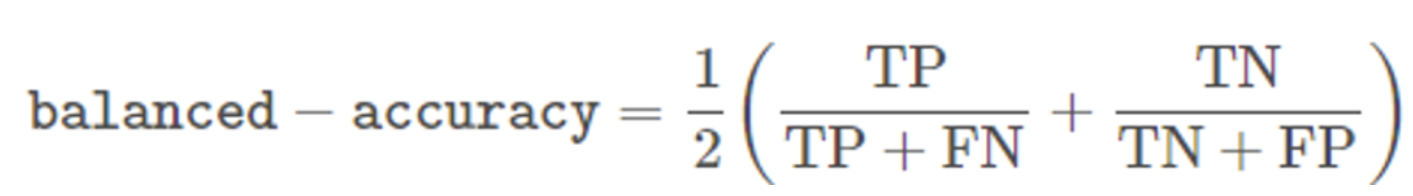

Untuk dataset seimbang, balanced_accuracy_score menjadi setara dengan akurasi_score.

**3. Dampak Data Ketidakseimbangan Kelas**

Sebagian besar algoritme pembelajaran mesin menganggap data terdistribusi secara merata. Jadi, ketika kita memiliki ketidakseimbangan kelas, pengklasifikasi pembelajaran mesin cenderung lebih bias terhadap kelas mayoritas, menyebabkan klasifikasi kelas minoritas yang buruk. Masalah utama dalam klasifikasi dataset kelas tidak seimbang melibatkan penentuan metrik kinerja yang paling cocok untuk digunakan.

Algoritme konvensional sering bias terhadap kelas mayoritas karena fungsi kerugiannya berupaya mengoptimalkan jumlah seperti tingkat kesalahan, tidak mempertimbangkan distribusi data. Dalam kasus terburuk, kelas minoritas diperlakukan sebagai outlier dari kelas mayoritas dan diabaikan. Algoritma pembelajaran hanya menghasilkan pengklasifikasi sepele yang mengklasifikasikan setiap contoh sebagai kelas mayoritas.

 **4. Bagaimana Menangani Kelas yang Tidak Seimbang?
Pergi ke Atas** 

**a. Mengubah Metrik Kinerja**

Untuk masalah klasifikasi, kinerja terutama ditentukan dengan menggunakan akurasi klasifikasi. Untuk kelas ketidakseimbangan tinggi, model akan memprediksi nilai kelas mayoritas untuk semua prediksi dan mencapai akurasi klasifikasi yang tinggi. Tetapi model ini tidak berguna dalam domain masalah. Ini disebut Paradoks Akurasi. Untuk mengatasi hal ini, metrik kinerja lain harus dipertimbangkan untuk evaluasi, kita dapat menggunakan matriks kebingungan, presisi, recall dan skor F1.

Matriks Kebingungan: tabel yang menunjukkan prediksi yang benar dan jenis prediksi yang salah

Presisi: jumlah positif sejati dibagi dengan semua prediksi positif. Presisi juga disebut Nilai Prediktif Positif. Ini adalah ukuran ketepatan pengklasifikasi. Presisi rendah menunjukkan jumlah positif palsu yang tinggi.

Ingat: jumlah positif sejati dibagi dengan jumlah nilai positif dalam data uji. Recall juga disebut Sensitivitas atau True Positive Rate. Ini adalah ukuran kelengkapan pengklasifikasi. Ingatan yang rendah menunjukkan jumlah negatif palsu yang tinggi.

Skor F1: rata-rata tertimbang presisi dan daya ingat.

**b. Pengambilan sampel ulang**

Pengambilan sampel ulang terdiri dari:

Di bawah pengambilan sampel kelas mayoritas: Teknik ini melibatkan penghapusan catatan acak dari kelas mayoritas, yang dapat menyebabkan hilangnya informasi. Hal ini dapat menyebabkan underfitting dan generalisasi yang buruk pada set tes.
Oversampling dari kelas minoritas: Menambahkan lebih banyak contoh dari kelas minoritas. Implementasi over-sampling yang paling sederhana adalah dengan menduplikasi record acak dari kelas minoritas, yang dapat menyebabkan overfitting.

**c. SMOTE (Teknik Over-sampling Minoritas Sintetis):**

Teknik oversampling yang menghasilkan sampel sintetis dari kelas minoritas. SMOTE bekerja dengan memanfaatkan algoritma k-nearest neighbor untuk membuat data sintetik. SMOTE pertama-tama dimulai dengan memilih data acak dari kelas minoritas, kemudian k-nearest tetangga dari data ditetapkan. Tergantung pada jumlah over-sampling yang diperlukan, tetangga dari k tetangga terdekat dipilih secara acak. Titik sintetik ditambahkan antara titik yang dipilih dan tetangganya. Ini dapat digunakan ketika kita dapat memisahkan kedua kelas dengan mudah.

**d. XGBoost (Peningkatan Gradien Ekstrim)**

Ini adalah implementasi yang canggih dan lebih efisien dari pohon keputusan yang didorong oleh gradien yang dirancang untuk kecepatan dan kinerja. Ini 10 kali lebih cepat dari Gradient Boosting normal karena mengimplementasikan pemrosesan paralel. Ini sangat fleksibel karena pengguna dapat menentukan tujuan pengoptimalan khusus dan kriteria evaluasi, memiliki mekanisme bawaan untuk menangani nilai yang hilang. Tidak seperti peningkatan gradien yang berhenti membelah simpul segera setelah mengalami kerugian negatif, XG Boost membagi hingga kedalaman maksimum yang ditentukan dan memangkas pohon ke belakang dan menghilangkan perpecahan di luar yang hanya ada kerugian negatif. Peningkatan gradien ekstrim dapat dilakukan dengan menggunakan paket XGBoost di R dan Python.
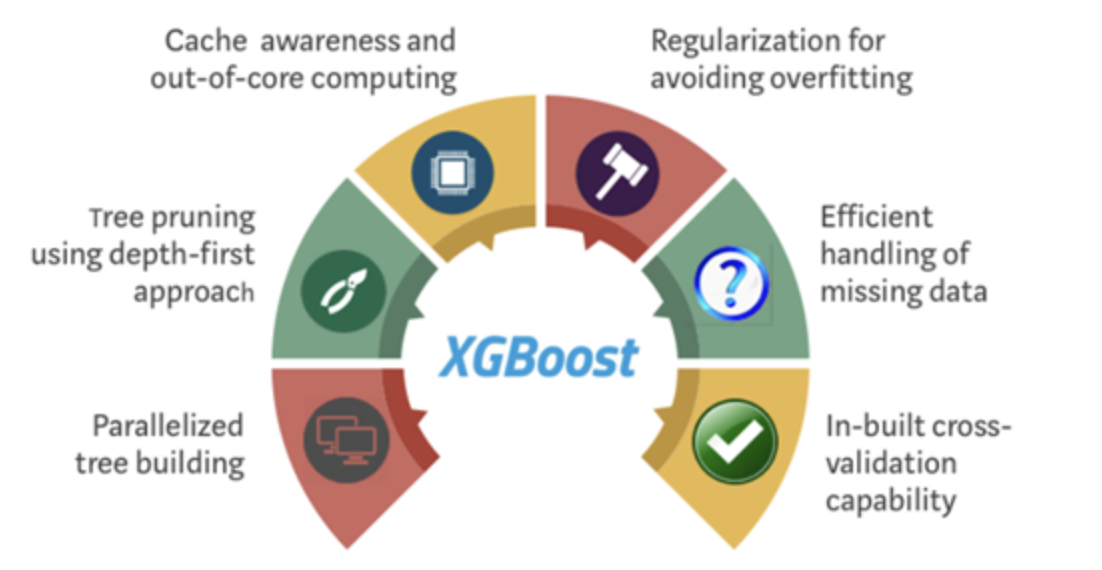

**e. Algoritma Berbasis Pohon**

Pohon keputusan sering berkinerja baik pada kumpulan data yang tidak seimbang karena struktur hierarkinya memungkinkan mereka untuk mempelajari sinyal dari kedua kelas. Dalam pembelajaran mesin terapan modern, ansambel pohon seperti Random Forests, Gradient Boosted Trees, dll. hampir selalu mengungguli pohon keputusan tunggal.


**5. Importing Libraries and Data File**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#For Sampling
from sklearn.utils import resample


#SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb 
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from collections import Counter
#Evaluation
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/content/aug_train.csv.zip')
df_test = pd.read_csv('/content/aug_test.csv.zip')

**6. EDA**

In [3]:
df.head().style.background_gradient(cmap='Dark2_r')

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.000000,1,< 1 Year,No,2630.000000,152.000000,16,0
1,17163,Male,42,1,28.000000,0,1-2 Year,Yes,43327.000000,26.000000,135,0
2,32023,Female,66,1,33.000000,0,1-2 Year,Yes,35841.000000,124.000000,253,0
3,87447,Female,22,1,33.000000,0,< 1 Year,No,27645.000000,152.000000,69,0
4,501933,Male,28,1,46.000000,1,< 1 Year,No,29023.000000,152.000000,211,0



*   All coloured columns are numerical columns
*   White column indicates categorical variable

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    382154 non-null  int64  
 1   Gender                382154 non-null  object 
 2   Age                   382154 non-null  int64  
 3   Driving_License       382154 non-null  int64  
 4   Region_Code           382154 non-null  float64
 5   Previously_Insured    382154 non-null  int64  
 6   Vehicle_Age           382154 non-null  object 
 7   Vehicle_Damage        382154 non-null  object 
 8   Annual_Premium        382154 non-null  float64
 9   Policy_Sales_Channel  382154 non-null  float64
 10  Vintage               382154 non-null  int64  
 11  Response              382154 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 35.0+ MB


In [5]:
print("Number of rows in Training set is = ", df.shape[0], " \nNumber of columns in Training set is = " , df.shape[1]) 

Number of rows in Training set is =  382154  
Number of columns in Training set is =  12


In [6]:
print("Number of rows in Test set is = ", df_test.shape[0], " \nNumber of columns in Test set is = " , df_test.shape[1]) 

Number of rows in Test set is =  78273  
Number of columns in Test set is =  11


**Missing Values Analysis**

In [7]:
df.isnull().sum().sum()

0

In [8]:
df_test.isnull().sum().sum()

0

There is no missing values in both test and training set

**Statistical Analysis of Numerical Columns**

In [9]:
df_num_col = df.select_dtypes(exclude=['object']).columns
df_num = df[df_num_col]
df_num.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,22,1,7.0,1,2630.0,152.0,16,0
1,17163,42,1,28.0,0,43327.0,26.0,135,0
2,32023,66,1,33.0,0,35841.0,124.0,253,0
3,87447,22,1,33.0,0,27645.0,152.0,69,0
4,501933,28,1,46.0,1,29023.0,152.0,211,0


In [10]:
df_num.describe().T.style.background_gradient(cmap='Oranges')

,count,mean,std,min,25%,50%,75%,max
id,382154.000000,234392.953477,139527.487326,1.000000,115006.250000,230461.500000,345434.750000,508145.000000
Age,382154.000000,38.545691,15.226897,20.000000,25.000000,36.000000,49.000000,85.000000
Driving_License,382154.000000,0.998108,0.043455,0.000000,1.000000,1.000000,1.000000,1.000000
Region_Code,382154.000000,26.406867,13.181241,0.000000,15.000000,28.000000,35.000000,52.000000
Previously_Insured,382154.000000,0.489182,0.499884,0.000000,0.000000,0.000000,1.000000,1.000000
Annual_Premium,382154.000000,30711.271362,17061.595532,2630.000000,24546.000000,31692.000000,39447.750000,540165.000000
Policy_Sales_Channel,382154.000000,111.939812,54.286511,1.000000,26.000000,145.000000,152.000000,163.000000
Vintage,382154.000000,154.189429,83.735107,10.000000,81.000000,154.000000,227.000000,299.000000
Response,382154.000000,0.163811,0.370104,0.000000,0.000000,0.000000,0.000000,1.000000


**Heat Map for correlation of numerical features**

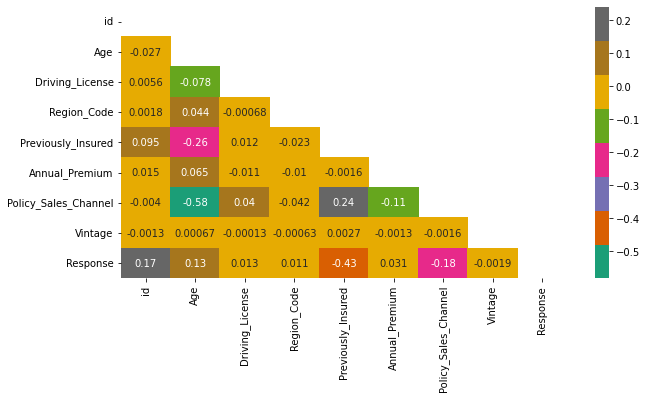

In [11]:
plt.figure(figsize=(10,5))
corr = df_num.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask = mask, annot=True, cmap='Dark2');

In [12]:
correlation = (pd.DataFrame(df_num.corr().Response))
correlation.sort_values(by='Response', ascending=False).style.background_gradient(cmap='coolwarm_r')

,Response
Response,1.000000
id,0.166621
Age,0.133149
Annual_Premium,0.030777
Driving_License,0.013250
Region_Code,0.011289
Vintage,-0.001884
Policy_Sales_Channel,-0.184514
Previously_Insured,-0.431224


In [13]:
df.drop('id',axis=1,inplace=True)

**Target Analysis & Visualization**

In [14]:
df['Response'].value_counts()

0    319553
1     62601
Name: Response, dtype: int64

In [15]:
#Count of Class zero
Response_0 =len(df[df["Response"]==0])
Response_0

319553

In [16]:
#Count of Class One
Response_1 =len(df[df["Response"]==1])
Response_1

62601

In [17]:
Total = len(df['Response'])

In [18]:
Percentage_Response_Zero = Response_0/Total
print("Percentage of Response_Zero is    : ",Percentage_Response_Zero*100)
Percentage_Response_One = Response_1/Total
print("Percentage of Response_One is    : ",Percentage_Response_One*100)

Percentage of Response_Zero is    :  83.61890756082626
Percentage of Response_One is    :  16.381092439173734


Text(0.5, 1.0, 'Class Distributions \n (0  || 1)')

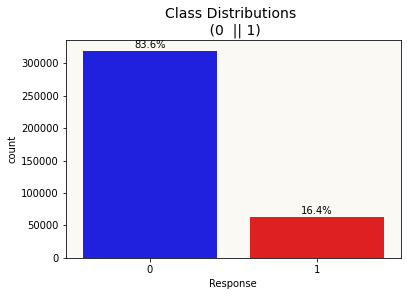

In [19]:
colors = ["blue", "red"]


ax = sns.countplot(x ='Response', data=df, palette=colors)
ax.set_facecolor('#faf9f4')
for p in ax.patches:
    percentage = f'{100 * p.get_height() / Total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    
    ax.annotate(percentage, (x, y), ha='center', va='center')
    
plt.title('Class Distributions \n (0  || 1)', fontsize=14)

**83% target termasuk ke dalam kelas dengan respose nol dan hanya 16,4% yang termasuk dalam kelas respon 1. yang jelas menunjukkan kelas tidak seimbang.**

**Feature Visualization**

In [20]:
def feature_plot(feature):
    plt.figure(figsize=(10, 3))
    ax = sns.countplot(x =feature,data=df, palette="cool_r")
    for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
    plt.show()

In [21]:
def feature_plot_with_target(feature):
    plt.figure(figsize=(10, 3))
    ax = sns.catplot(x='Response', col=feature, kind='count', data=df, palette="cool_r");
    for ax in ax.axes.ravel():
        for p in ax.patches:
            ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
    plt.show()

**Gender**

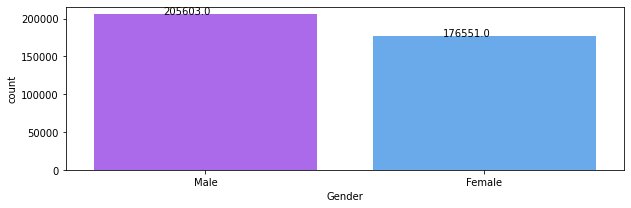

In [22]:
feature_plot('Gender')

**Jenis Kelamin dengan Respon**

<Figure size 720x216 with 0 Axes>

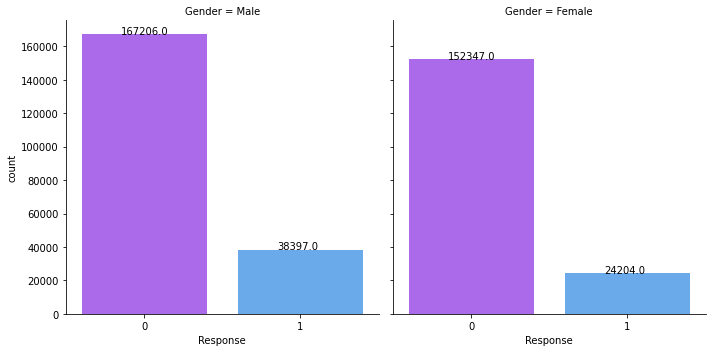

In [23]:
feature_plot_with_target('Gender')

**Driving_License**

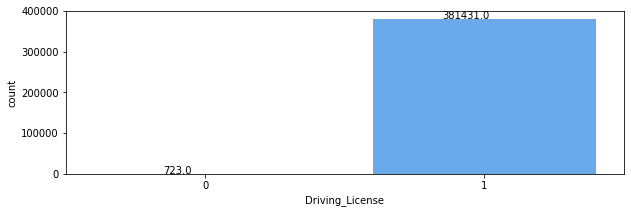

In [24]:
feature_plot('Driving_License')

**Driving_License wrt Response**

<Figure size 720x216 with 0 Axes>

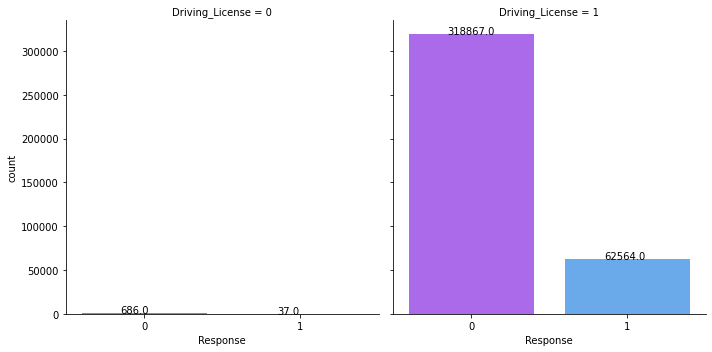

In [25]:
feature_plot_with_target('Driving_License')

**Previously_Insured**

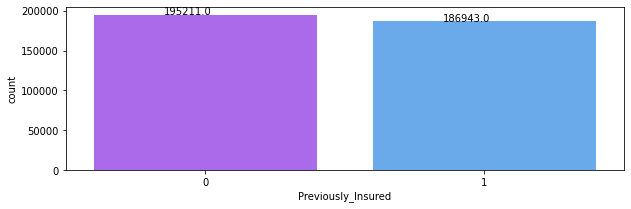

In [26]:
feature_plot('Previously_Insured')

**Previously_Insured wrt Response**

<Figure size 720x216 with 0 Axes>

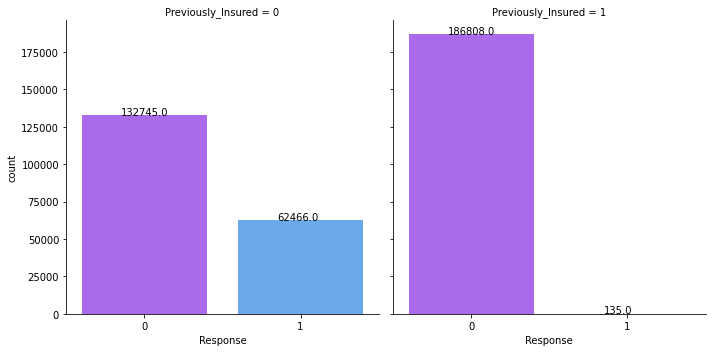

In [27]:
feature_plot_with_target('Previously_Insured')

**Vehicle_Age**

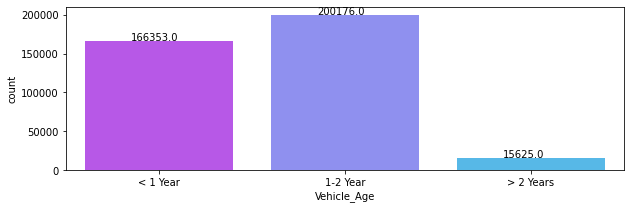

In [28]:
feature_plot('Vehicle_Age')

**Vehicle_Age wrt Response**

<Figure size 720x216 with 0 Axes>

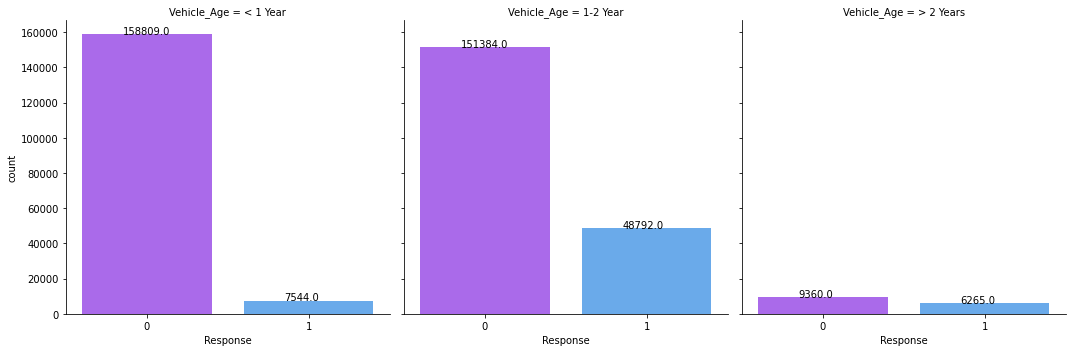

In [29]:
feature_plot_with_target('Vehicle_Age')

**Vehicle_Damage**

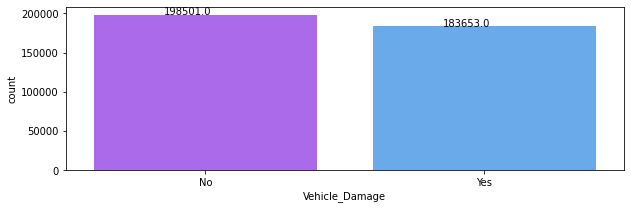

In [30]:
feature_plot('Vehicle_Damage')

**Vehicle_Damage wrt Response**

<Figure size 720x216 with 0 Axes>

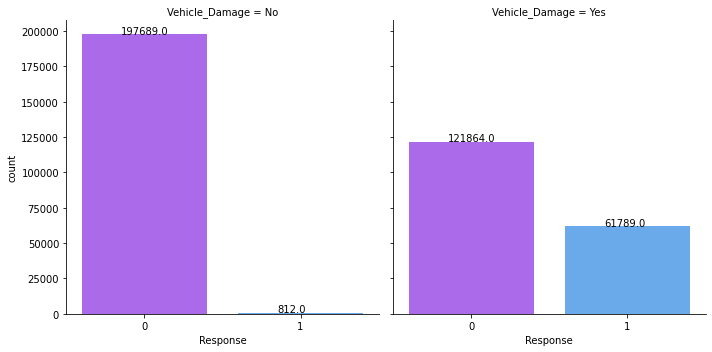

In [31]:
feature_plot_with_target('Vehicle_Damage')

**Age**

In [32]:
def hist_feat(feature):
    plt.figure(figsize=(10, 3))
    sns.histplot(df[feature].dropna(),kde=True,color='purple',bins=30)

In [33]:
def dist_feat_w_target(feature):
    sns.displot(data=df, x=feature,hue='Response',kind ='kde')

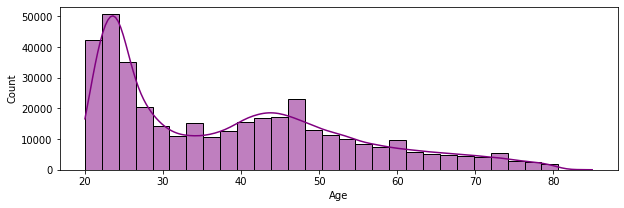

In [34]:
hist_feat('Age')

**Age wrt Response**

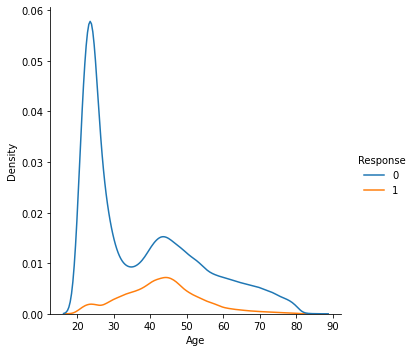

In [35]:
dist_feat_w_target('Age')

**Policy_Sales_Channel**

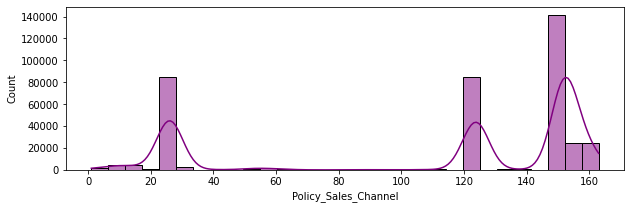

In [36]:
hist_feat('Policy_Sales_Channel')

**Policy_Sales_Channel wrt Response**

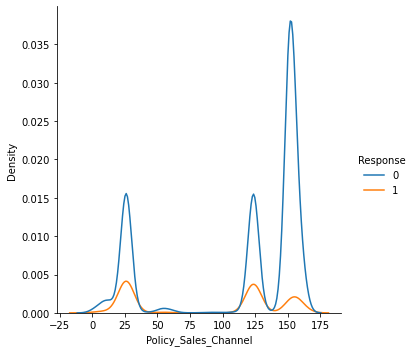

In [37]:
dist_feat_w_target('Policy_Sales_Channel')

**Annual_Premium**

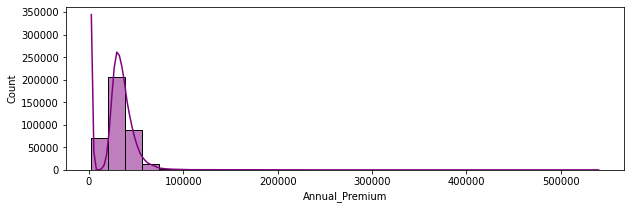

In [38]:
hist_feat('Annual_Premium')

**Annual_Premium wrt Response**

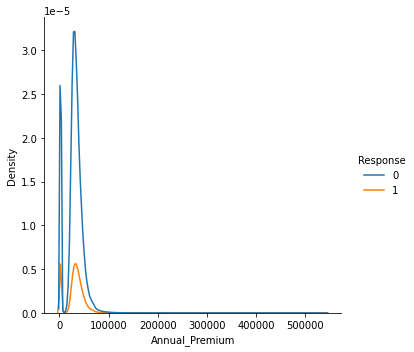

In [39]:
dist_feat_w_target('Annual_Premium')

**Top 5 Region_Code**

Text(0.5, 1.0, 'Top 5 Region_Code ')

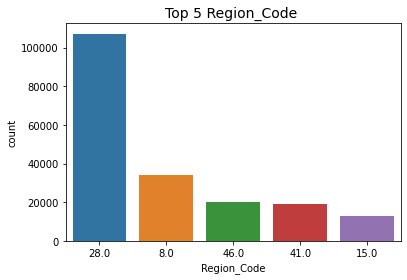

In [40]:
sns.countplot(x = 'Region_Code',data=df, order=df.Region_Code.value_counts().iloc[:5].index)
plt.title('Top 5 Region_Code ', fontsize=14) 

**7. Encoding Categorical Feature**s

In [41]:
X = df.drop(['Response'],axis = 1)
y = df['Response']

In [42]:
X = pd.get_dummies(X, drop_first=True)
X.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,22,1,7.0,1,2630.0,152.0,16,1,1,0,0
1,42,1,28.0,0,43327.0,26.0,135,1,0,0,1
2,66,1,33.0,0,35841.0,124.0,253,0,0,0,1
3,22,1,33.0,0,27645.0,152.0,69,0,1,0,0
4,28,1,46.0,1,29023.0,152.0,211,1,1,0,0


**8. Splitting data set to training and Test set**

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**9. Feature Scaling**

In [44]:
cols = X_train.columns

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train,columns=cols)
X_test = pd.DataFrame(X_test,columns=cols)

**10. Random Sampling**

**10.1 Oversample minority class**

In [45]:
train_data=pd.concat([X_train,y_train],axis=1)

Response_Zero=train_data[train_data.Response==0]
Response_One=train_data[train_data.Response==1]

In [46]:
upsampled_One = resample(Response_One,
                          replace=True, # sample with replacement
                          n_samples=len(Response_Zero), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([Response_Zero, upsampled_One])

In [47]:
y_train.value_counts()

0    223800
1     43707
Name: Response, dtype: int64

In [48]:
upsampled['Response'].value_counts()

0.0    223800
1.0    223800
Name: Response, dtype: int64

**Visualisation of Target of Oversampled minority class**

Text(0, 0.5, 'count')

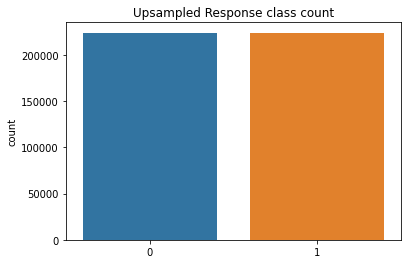

In [49]:
y1=upsampled.Response.value_counts()
sns.barplot(y=y1,x=[0,1])
plt.title('Upsampled Response class count')
plt.ylabel('count')

**10.2 Undersample majority class**

In [50]:
df['Response'].value_counts()

0    319553
1     62601
Name: Response, dtype: int64

In [51]:
downsampled_Zero = resample(Response_Zero,
                                replace = False, # sample without replacement
                                n_samples = len(Response_One), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([downsampled_Zero, Response_One])

In [52]:
downsampled['Response'].value_counts()

0.0    43707
1.0    43707
Name: Response, dtype: int64

Text(0, 0.5, 'count')

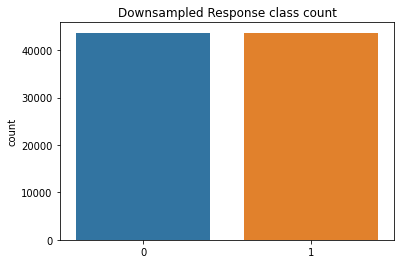

In [53]:
y2=downsampled.Response.value_counts()
sns.barplot(y=y2,x=[0,1])
plt.title('Downsampled Response class count')
plt.ylabel('count')